2025-06-14 11:58:48.565462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749902328.798854      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749902328.864999      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🌍 CO₂ Prediction Neural Network Comparison
🔧 Step 1: Data Preparation
✅ Dataset loaded successfully: 46 years (1979-2024)
📊 CO₂ range: 336.85 - 422.79 ppm
🧩 Created 41 sequences with window size 5
📐 Input shape: (41, 5, 3), Output shape: (41,)

🧪 Step 2: Train-Test Split
📚 Training set: 32 samples
🧪 Test set: 9 samples

🔁 Step 4: Creating Model Architecture Variants (without Vanilla LSTM)


I0000 00:00:1749902341.992510      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


✅ Bidirectional LSTM: 38,977 parameters
✅ GRU: 23,201 parameters
✅ Stacked LSTM: 30,369 parameters
✅ Simple LSTM: 4,641 parameters

🧠 Step 5: Training Models (epochs=150, batch_size=16)

🚀 Training Bidirectional LSTM...
Epoch 1/150


I0000 00:00:1749902347.164461      92 cuda_dnn.cc:529] Loaded cuDNN version 90300


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 787ms/step - loss: 0.1821 - mae: 0.3822 - root_mean_squared_error: 0.4265 - val_loss: 0.5859 - val_mae: 0.7626 - val_root_mean_squared_error: 0.7654 - learning_rate: 0.0010
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1205 - mae: 0.3080 - root_mean_squared_error: 0.3468 - val_loss: 0.3862 - val_mae: 0.6189 - val_root_mean_squared_error: 0.6215 - learning_rate: 0.0010
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0794 - mae: 0.2431 - root_mean_squared_error: 0.2814 - val_loss: 0.2209 - val_mae: 0.4679 - val_root_mean_squared_error: 0.4700 - learning_rate: 0.0010
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0346 - mae: 0.1574 - root_mean_squared_error: 0.1859 - val_loss: 0.1015 - val_mae: 0.3167 - val_root_mean_squared_error: 0.3185 - learning_rate: 0.0010
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0112 - mae: 0.0867 - root_mean_squared_error: 0.1059 - val_loss: 0.0284 - val_mae: 0.1669 - val_root_me

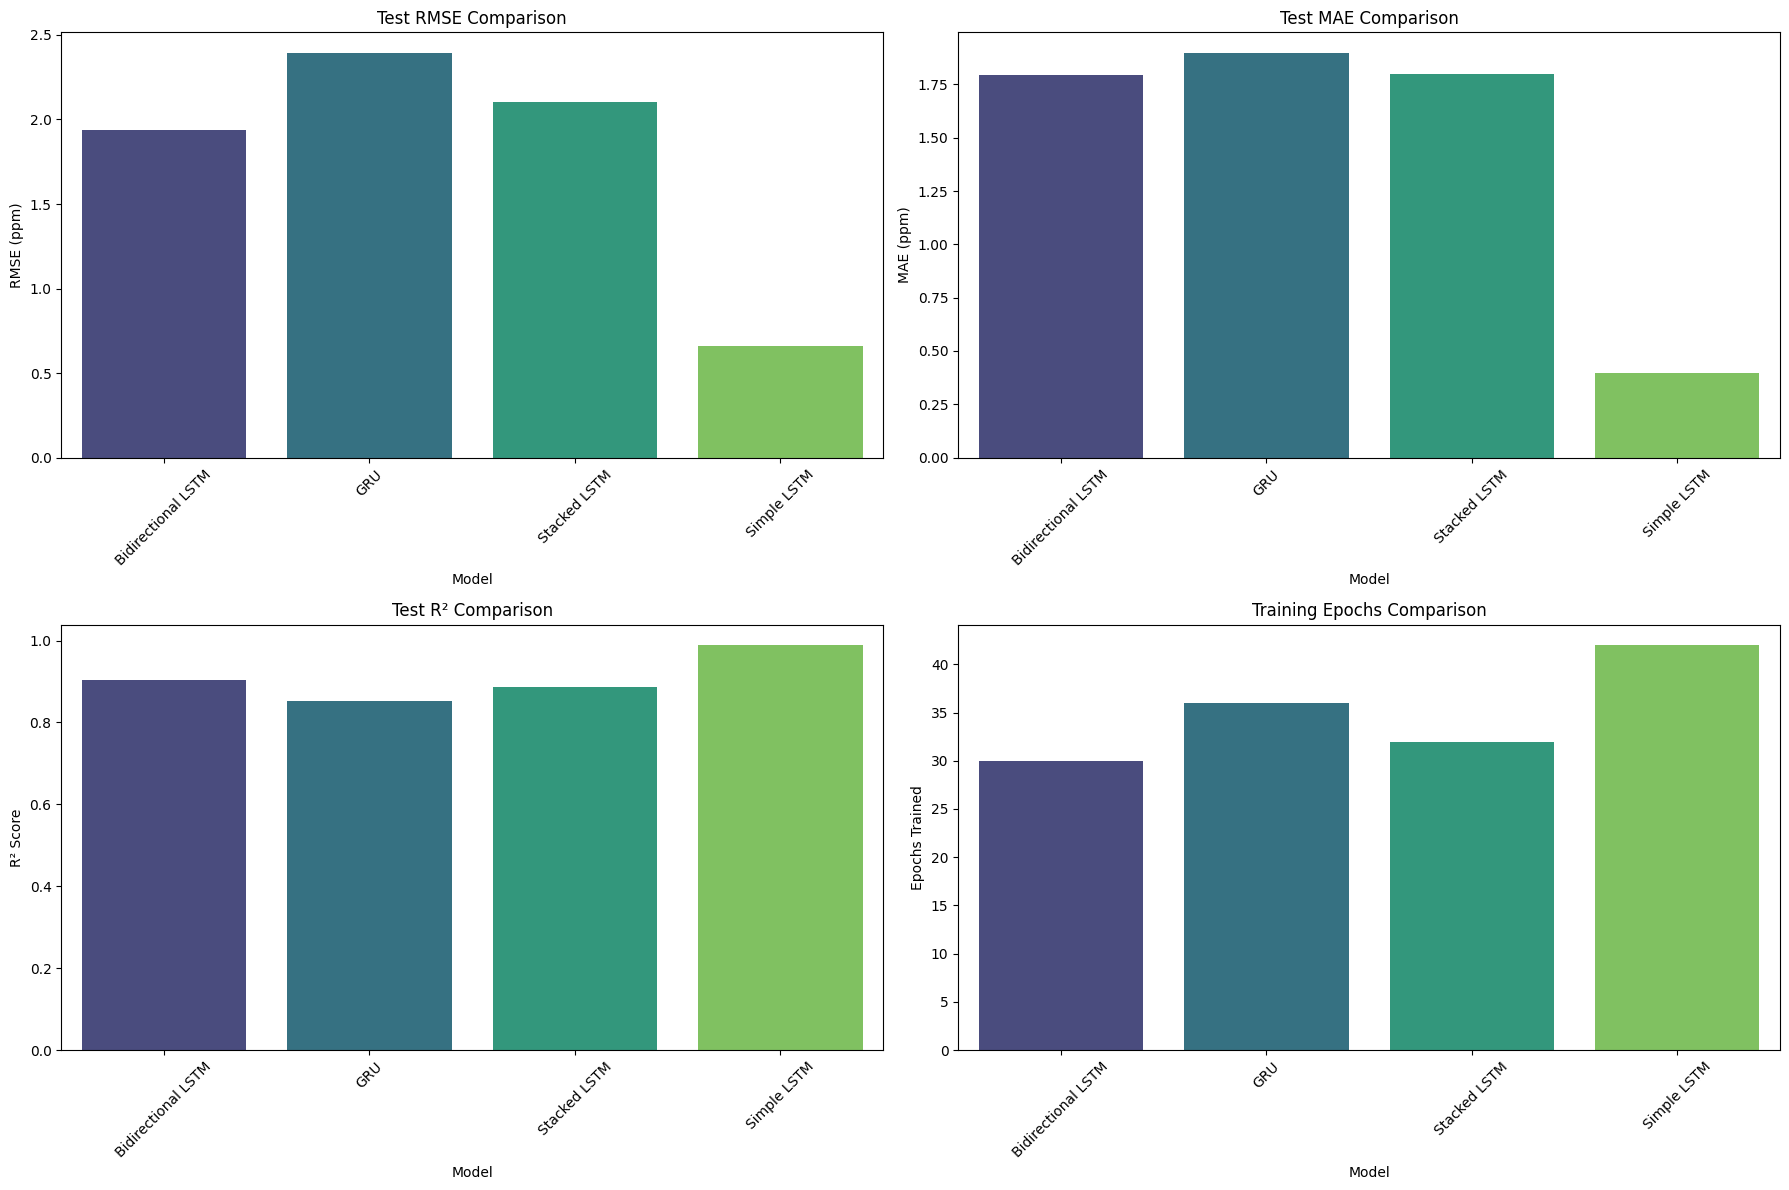

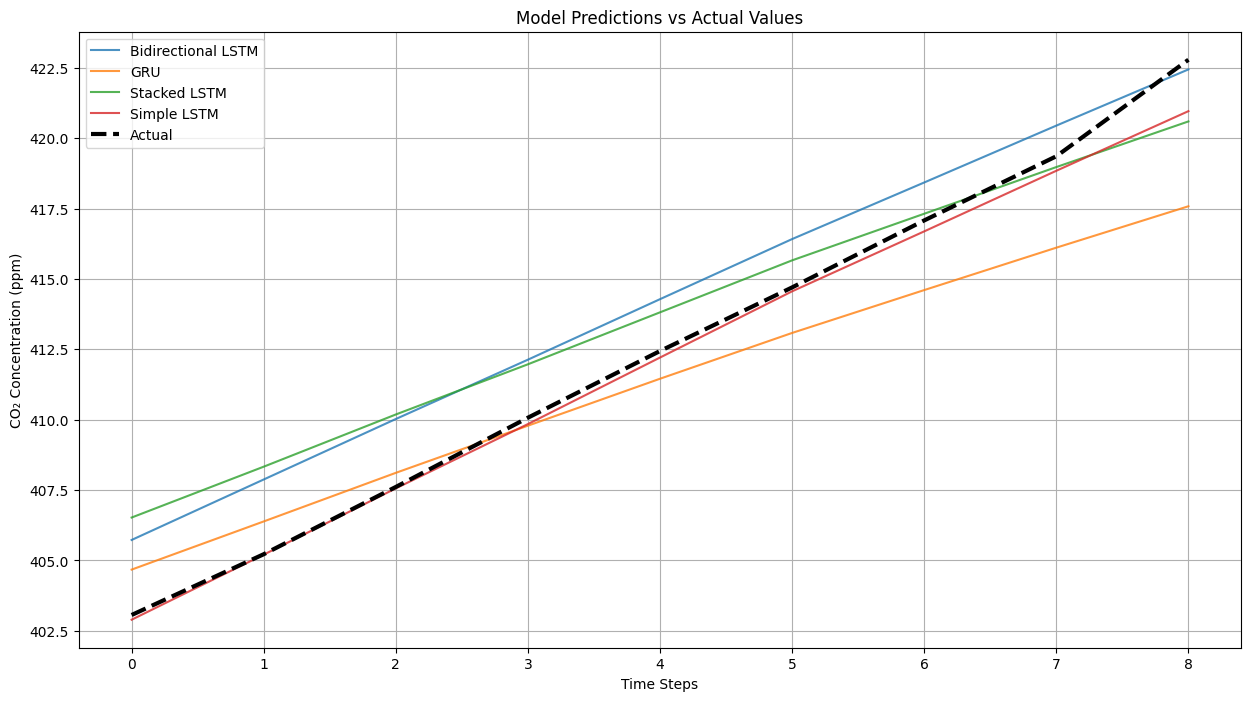


🔍 Step 7: Summary of Findings

📊 Step 6: Evaluating Models

📈 Bidirectional LSTM Performance:
  RMSE: Train 5.8396 | Test 1.9352
  MAE:  Train 5.7766 | Test 1.7932
  R²:   Train 0.8734 | Test 0.9039

📈 GRU Performance:
  RMSE: Train 9.3238 | Test 2.3958
  MAE:  Train 9.0124 | Test 1.8994
  R²:   Train 0.6774 | Test 0.8527

📈 Stacked LSTM Performance:
  RMSE: Train 9.1963 | Test 2.1009
  MAE:  Train 9.0443 | Test 1.7996
  R²:   Train 0.6861 | Test 0.8867

📈 Simple LSTM Performance:
  RMSE: Train 6.0238 | Test 0.6592
  MAE:  Train 5.3628 | Test 0.3957
  R²:   Train 0.8653 | Test 0.9888

🏆 Model Performance Ranking (by Test RMSE):
             Model  Test RMSE  Test MAE  Test R2  Epochs
       Simple LSTM   0.659229  0.395716 0.988847      42
Bidirectional LSTM   1.935233  1.793247 0.903886      30
      Stacked LSTM   2.100891  1.799608 0.886727      32
               GRU   2.395827  1.899385 0.852690      36

📊 Key Comparisons:
1. Best vs Worst RMSE: Simple LSTM (0.66) vs GRU (2.40)
2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class CO2Predictor:
    def __init__(self, window_size=5):
        self.window_size = window_size
        self.scaler = MinMaxScaler()
        self.models = {}
        self.results = {}
        
    def load_and_prepare_data(self, file_path):
        """Step 1: Enhanced Data Preparation"""
        print("🔧 Step 1: Data Preparation")
        
        try:
            # Load the dataset with error handling
            df = pd.read_csv(file_path, comment='#', skip_blank_lines=True)
            
            # Clean column names and handle potential whitespace issues
            df.columns = df.columns.str.strip()
            
            # Validate required columns
            if not all(col in df.columns for col in ['year', 'mean']):
                raise ValueError("Required columns 'year' or 'mean' not found in dataset")
            
            # Convert to numeric with better error handling
            numeric_cols = ['year', 'mean']
            df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
            
            # Remove invalid data points
            df = df.dropna(subset=numeric_cols)
            df = df[df['mean'] > 0]  # Remove negative or zero CO2 values
            
            # Add time-related features
            df['year_normalized'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
            
            # Reset index after filtering
            df = df.reset_index(drop=True)
            
            print(f"✅ Dataset loaded successfully: {len(df)} years ({df['year'].min()}-{df['year'].max()})")
            print(f"📊 CO₂ range: {df['mean'].min():.2f} - {df['mean'].max():.2f} ppm")
            
            self.df = df
            return df
            
        except Exception as e:
            print(f"❌ Error loading data: {str(e)}")
            raise

    def create_sequences(self, data):
        """Enhanced sequence creation with multi-feature support"""
        X, y = [], []
        for i in range(self.window_size, len(data)):
            X.append(data[i-self.window_size:i])
            y.append(data[i, 0])  # Assuming target is first column
        return np.array(X), np.array(y)
    
    def prepare_features(self):
        """Enhanced feature preparation with multiple scalers"""
        # Prepare features and target
        features = self.df[['mean', 'year_normalized']].values
        target = self.df['mean'].values.reshape(-1, 1)
        
        # Scale features and target separately
        self.feature_scaler = MinMaxScaler()
        self.target_scaler = MinMaxScaler()
        
        features_scaled = self.feature_scaler.fit_transform(features)
        target_scaled = self.target_scaler.fit_transform(target)
        
        # Combine features and target for sequencing
        data = np.column_stack([target_scaled, features_scaled])
        
        # Create sequences
        X, y = self.create_sequences(data)
        
        print(f"🧩 Created {len(X)} sequences with window size {self.window_size}")
        print(f"📐 Input shape: {X.shape}, Output shape: {y.shape}")
        
        self.X, self.y = X, y
        return X, y
    
    def train_test_split(self, test_size=0.2):
        """Enhanced train-test split with time-based validation"""
        print("\n🧪 Step 2: Train-Test Split")
        
        # Use time-based split (last 20% for test)
        split_idx = int(len(self.X) * (1 - test_size))
        
        self.X_train, self.X_test = self.X[:split_idx], self.X[split_idx:]
        self.y_train, self.y_test = self.y[:split_idx], self.y[split_idx:]
        
        print(f"📚 Training set: {len(self.X_train)} samples")
        print(f"🧪 Test set: {len(self.X_test)} samples")
        
        return self.X_train, self.X_test, self.y_train, self.y_test

    def create_model_variants(self):
        """Enhanced model architectures with regularization (without Vanilla LSTM)"""
        print("\n🔁 Step 4: Creating Model Architecture Variants (without Vanilla LSTM)")
        
        models = {}
        
        # Common model parameters
        input_shape = (self.window_size, self.X.shape[2])
        
        # Model 1: Bidirectional LSTM
        models['Bidirectional LSTM'] = Sequential([
            Bidirectional(LSTM(64, return_sequences=False)),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        
        # Model 2: GRU with skip connection
        models['GRU'] = Sequential([
            GRU(64, input_shape=input_shape, return_sequences=True),
            GRU(32, return_sequences=False),
            Dense(16, activation='relu'),
            Dense(1)
        ])
        
        # Model 3: Stacked LSTM
        models['Stacked LSTM'] = Sequential([
            LSTM(64, input_shape=input_shape, return_sequences=True),
            LSTM(32, return_sequences=False),
            Dense(16, activation='relu'),
            Dense(1)
        ])
        
        # Model 4: Simpler model for comparison
        models['Simple LSTM'] = Sequential([
            LSTM(32, input_shape=input_shape),
            Dense(1)
        ])
        
        # Compile all models with adaptive learning rate
        for name, model in models.items():
            optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
            model.compile(optimizer=optimizer, 
                         loss='mse', 
                         metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])
            
            # Build the model explicitly by passing a sample input shape
            model.build((None, *input_shape))
            print(f"✅ {name}: {model.count_params():,} parameters")
        
        self.models = models
        return models
    
    def train_models(self, epochs=150, batch_size=16):
        """Enhanced training with more callbacks and metrics"""
        print(f"\n🧠 Step 5: Training Models (epochs={epochs}, batch_size={batch_size})")
        
        # Enhanced callbacks
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6),
            ModelCheckpoint('best_model.h5', save_best_only=True)
        ]
        
        results = {}
        
        for name, model in self.models.items():
            print(f"\n🚀 Training {name}...")
            
            history = model.fit(
                self.X_train, self.y_train,
                validation_data=(self.X_test, self.y_test),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=callbacks,
                verbose=1
            )
            
            # Store predictions
            train_pred = model.predict(self.X_train)
            test_pred = model.predict(self.X_test)
            
            # Store model and history
            results[name] = {
                'model': model,
                'history': history,
                'train_pred': train_pred,
                'test_pred': test_pred,
                'epochs_trained': len(history.history['loss'])
            }
            
            print(f"  ✅ Epochs trained: {results[name]['epochs_trained']}")
        
        self.results = results
        return results

    def evaluate_models(self):
        """Evaluate all trained models"""
        print("\n📊 Step 6: Evaluating Models")
        
        evaluation = []
        
        for name, result in self.results.items():
            # Inverse transform predictions and actual values
            train_pred = self.target_scaler.inverse_transform(result['train_pred'])
            test_pred = self.target_scaler.inverse_transform(result['test_pred'])
            y_train_actual = self.target_scaler.inverse_transform(self.y_train.reshape(-1, 1))
            y_test_actual = self.target_scaler.inverse_transform(self.y_test.reshape(-1, 1))
            
            # Calculate metrics
            metrics = {
                'Model': name,
                'Train RMSE': np.sqrt(mean_squared_error(y_train_actual, train_pred)),
                'Test RMSE': np.sqrt(mean_squared_error(y_test_actual, test_pred)),
                'Train MAE': mean_absolute_error(y_train_actual, train_pred),
                'Test MAE': mean_absolute_error(y_test_actual, test_pred),
                'Train R2': r2_score(y_train_actual, train_pred),
                'Test R2': r2_score(y_test_actual, test_pred),
                'Epochs': result['epochs_trained']
            }
            
            evaluation.append(metrics)
            
            print(f"\n📈 {name} Performance:")
            print(f"  RMSE: Train {metrics['Train RMSE']:.4f} | Test {metrics['Test RMSE']:.4f}")
            print(f"  MAE:  Train {metrics['Train MAE']:.4f} | Test {metrics['Test MAE']:.4f}")
            print(f"  R²:   Train {metrics['Train R2']:.4f} | Test {metrics['Test R2']:.4f}")
        
        return pd.DataFrame(evaluation)

    def plot_model_comparison(self):
        """Enhanced visualization for model comparison"""
        if not hasattr(self, 'results'):
            print("❌ No results to plot. Train models first.")
            return
            
        # Get evaluation metrics
        eval_df = self.evaluate_models()
        
        # Set up the figure
        plt.figure(figsize=(18, 12))
        
        # 1. RMSE Comparison
        plt.subplot(2, 2, 1)
        sns.barplot(x='Model', y='Test RMSE', data=eval_df, palette='viridis')
        plt.title('Test RMSE Comparison')
        plt.xticks(rotation=45)
        plt.ylabel('RMSE (ppm)')
        
        # 2. MAE Comparison
        plt.subplot(2, 2, 2)
        sns.barplot(x='Model', y='Test MAE', data=eval_df, palette='viridis')
        plt.title('Test MAE Comparison')
        plt.xticks(rotation=45)
        plt.ylabel('MAE (ppm)')
        
        # 3. R2 Comparison
        plt.subplot(2, 2, 3)
        sns.barplot(x='Model', y='Test R2', data=eval_df, palette='viridis')
        plt.title('Test R² Comparison')
        plt.xticks(rotation=45)
        plt.ylabel('R² Score')
        
        # 4. Training Time Comparison (using epochs as proxy)
        plt.subplot(2, 2, 4)
        sns.barplot(x='Model', y='Epochs', data=eval_df, palette='viridis')
        plt.title('Training Epochs Comparison')
        plt.xticks(rotation=45)
        plt.ylabel('Epochs Trained')
        
        plt.tight_layout()
        plt.show()
        
        # Additional comparison: Actual vs Predicted for all models
        plt.figure(figsize=(15, 8))
        for name, result in self.results.items():
            y_pred = self.target_scaler.inverse_transform(result['test_pred'])
            plt.plot(y_pred, label=name, alpha=0.8)
        
        plt.plot(self.target_scaler.inverse_transform(self.y_test.reshape(-1, 1)), 
                label='Actual', linewidth=3, color='black', linestyle='--')
        plt.title('Model Predictions vs Actual Values')
        plt.xlabel('Time Steps')
        plt.ylabel('CO₂ Concentration (ppm)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def summarize_findings(self):
        """Print summary of findings with enhanced comparison"""
        print("\n🔍 Step 7: Summary of Findings")
        
        if not hasattr(self, 'results'):
            print("❌ No results to summarize. Train models first.")
            return
            
        # Get evaluation DataFrame
        eval_df = self.evaluate_models()
        
        # Sort models by test RMSE (ascending)
        eval_df = eval_df.sort_values('Test RMSE')
        
        print("\n🏆 Model Performance Ranking (by Test RMSE):")
        print(eval_df[['Model', 'Test RMSE', 'Test MAE', 'Test R2', 'Epochs']].to_string(index=False))
        
        best_model = eval_df.iloc[0]
        worst_model = eval_df.iloc[-1]
        
        print("\n📊 Key Comparisons:")
        print(f"1. Best vs Worst RMSE: {best_model['Model']} ({best_model['Test RMSE']:.2f}) vs "
              f"{worst_model['Model']} ({worst_model['Test RMSE']:.2f})")
        print(f"2. Range of R² Scores: {eval_df['Test R2'].min():.3f} to {eval_df['Test R2'].max():.3f}")
        print(f"3. Training Efficiency: Models converged in {eval_df['Epochs'].min()} to {eval_df['Epochs'].max()} epochs")

# Main execution with better error handling
def main():
    print("🌍 CO₂ Prediction Neural Network Comparison")
    print("=" * 50)
    
    try:
        # Initialize predictor with configurable window size
        predictor = CO2Predictor(window_size=5)
        
        # Load and prepare data with error handling
        df = predictor.load_and_prepare_data('/kaggle/input/co2-forcasting/co2_annmean_gl.csv')
        
        # Create sequences and split data
        X, y = predictor.prepare_features()
        X_train, X_test, y_train, y_test = predictor.train_test_split(test_size=0.2)
        
        # Create and train models (without Vanilla LSTM)
        models = predictor.create_model_variants()
        results = predictor.train_models(epochs=150, batch_size=16)
        
        # Evaluate and visualize results with enhanced comparison
        eval_df = predictor.evaluate_models()
        predictor.plot_model_comparison()
        predictor.summarize_findings()
        
        return predictor, eval_df
        
    except Exception as e:
        print(f"❌ Error in main execution: {str(e)}")
        return None, None

if __name__ == "__main__":
    predictor, evaluation = main()

🌍 CO₂ Prediction Neural Network Comparison
🔧 Step 1: Data Preparation
✅ Dataset loaded successfully: 46 years (1979-2024)
📊 CO₂ range: 336.85 - 422.79 ppm
🧩 Created 41 sequences with window size 5
📐 Input shape: (41, 5, 3), Output shape: (41,)

🧪 Step 2: Train-Test Split
📚 Training set: 32 samples
🧪 Test set: 9 samples

🔁 Step 4: Creating Model Architecture Variants (without Vanilla LSTM)
✅ Bidirectional LSTM: 38,977 parameters
✅ GRU: 23,201 parameters
✅ Stacked LSTM: 30,369 parameters
✅ Simple LSTM: 4,641 parameters

🧠 Step 5: Training Models (epochs=150, batch_size=16)

🚀 Training Bidirectional LSTM...
Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 533ms/step - loss: 0.2235 - mae: 0.4157 - root_mean_squared_error: 0.4725 - val_loss: 0.5918 - val_mae: 0.7666 - val_root_mean_squared_error: 0.7693 - learning_rate: 0.0010
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1223 - mae: 0.3013 - root_mean_squared_error: 0.3490 - val_loss: 0.2906 - val_mae: 0.5369 - val_root_mean_squared_e

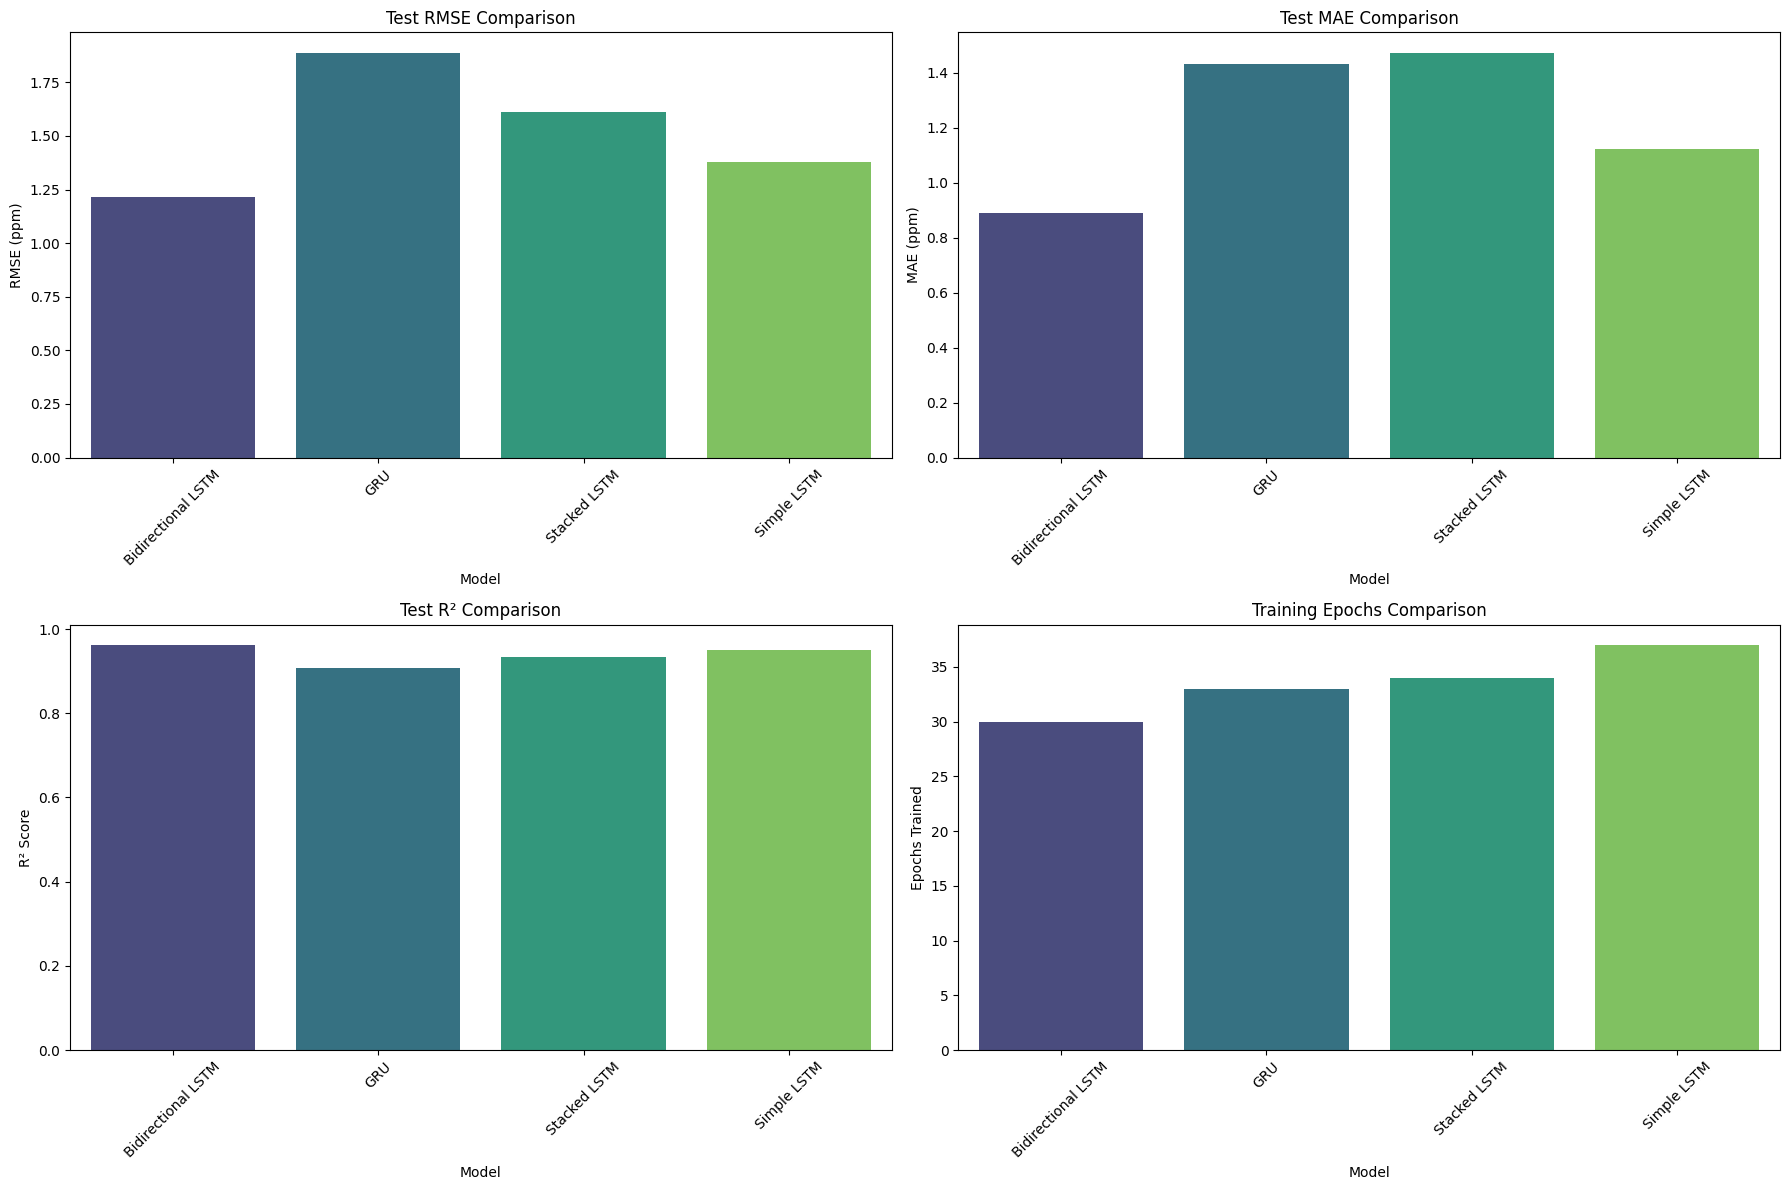

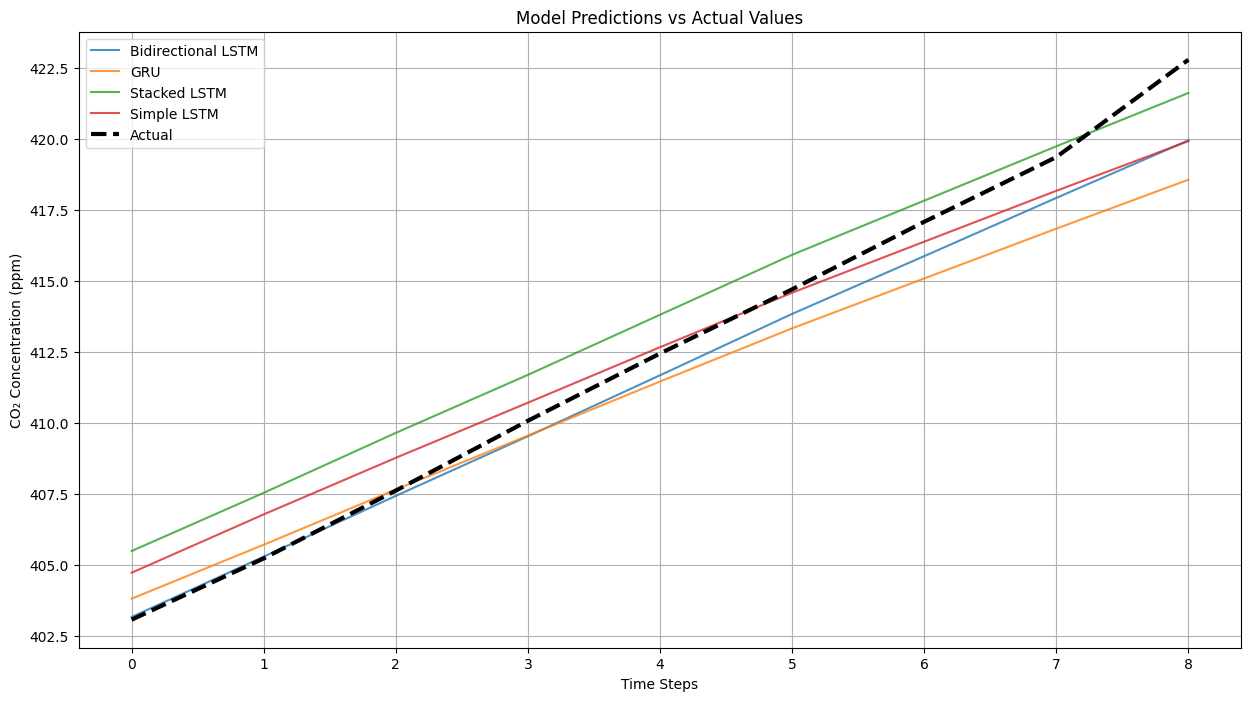


🔍 Step 7: Summary of Findings

📊 Step 6: Evaluating Models

📈 Bidirectional LSTM Performance:
  RMSE: Train 3.7890 | Test 1.2150
  MAE:  Train 3.6611 | Test 0.8903
  R²:   Train 0.9467 | Test 0.9621

📈 GRU Performance:
  RMSE: Train 8.4695 | Test 1.8891
  MAE:  Train 8.0161 | Test 1.4322
  R²:   Train 0.7338 | Test 0.9084

📈 Stacked LSTM Performance:
  RMSE: Train 7.1140 | Test 1.6110
  MAE:  Train 6.9463 | Test 1.4732
  R²:   Train 0.8122 | Test 0.9334

📈 Simple LSTM Performance:
  RMSE: Train 6.4793 | Test 1.3771
  MAE:  Train 6.3286 | Test 1.1214
  R²:   Train 0.8442 | Test 0.9513

🏆 Model Performance Ranking (by Test RMSE):
             Model  Test RMSE  Test MAE  Test R2  Epochs
Bidirectional LSTM   1.215035  0.890331 0.962112      30
       Simple LSTM   1.377109  1.121365 0.951331      37
      Stacked LSTM   1.610988  1.473206 0.933395      34
               GRU   1.889100  1.432157 0.908414      33

📊 Key Comparisons:
1. Best vs Worst RMSE: Bidirectional LSTM (1.22) vs GRU (1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

class CO2Predictor:
    def __init__(self, window_size=5):
        self.window_size = window_size
        self.scaler = MinMaxScaler()
        self.models = {}
        self.results = {}

    def load_and_prepare_data(self, file_path):
        print("🔧 Step 1: Data Preparation")
        try:
            df = pd.read_csv(file_path, comment='#', skip_blank_lines=True)
            df.columns = df.columns.str.strip()
            if not all(col in df.columns for col in ['year', 'mean']):
                raise ValueError("Required columns 'year' or 'mean' not found in dataset")
            numeric_cols = ['year', 'mean']
            df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
            df = df.dropna(subset=numeric_cols)
            df = df[df['mean'] > 0]
            df['year_normalized'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
            df = df.reset_index(drop=True)
            print(f"✅ Dataset loaded successfully: {len(df)} years ({df['year'].min()}-{df['year'].max()})")
            print(f"📊 CO₂ range: {df['mean'].min():.2f} - {df['mean'].max():.2f} ppm")
            self.df = df
            return df
        except Exception as e:
            print(f"❌ Error loading data: {str(e)}")
            raise

    def create_sequences(self, data):
        X, y = [], []
        for i in range(self.window_size, len(data)):
            X.append(data[i-self.window_size:i])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    def prepare_features(self):
        features = self.df[['mean', 'year_normalized']].values
        target = self.df['mean'].values.reshape(-1, 1)
        self.feature_scaler = MinMaxScaler()
        self.target_scaler = MinMaxScaler()
        features_scaled = self.feature_scaler.fit_transform(features)
        target_scaled = self.target_scaler.fit_transform(target)
        data = np.column_stack([target_scaled, features_scaled])
        X, y = self.create_sequences(data)
        print(f"🧩 Created {len(X)} sequences with window size {self.window_size}")
        print(f"📐 Input shape: {X.shape}, Output shape: {y.shape}")
        self.X, self.y = X, y
        return X, y

    def train_test_split(self, test_size=0.2):
        print("\n🧪 Step 2: Train-Test Split")
        split_idx = int(len(self.X) * (1 - test_size))
        self.X_train, self.X_test = self.X[:split_idx], self.X[split_idx:]
        self.y_train, self.y_test = self.y[:split_idx], self.y[split_idx:]
        print(f"📚 Training set: {len(self.X_train)} samples")
        print(f"🧪 Test set: {len(self.X_test)} samples")
        return self.X_train, self.X_test, self.y_train, self.y_test

    def create_model_variants(self):
        print("\n🔁 Step 4: Creating Model Architecture Variants (without Vanilla LSTM)")
        models = {}
        input_shape = (self.window_size, self.X.shape[2])
        models['Bidirectional LSTM'] = Sequential([
            Bidirectional(LSTM(64, return_sequences=False)),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        models['GRU'] = Sequential([
            GRU(64, input_shape=input_shape, return_sequences=True),
            GRU(32, return_sequences=False),
            Dense(16, activation='relu'),
            Dense(1)
        ])
        models['Stacked LSTM'] = Sequential([
            LSTM(64, input_shape=input_shape, return_sequences=True),
            LSTM(32, return_sequences=False),
            Dense(16, activation='relu'),
            Dense(1)
        ])
        models['Simple LSTM'] = Sequential([
            LSTM(32, input_shape=input_shape),
            Dense(1)
        ])
        for name, model in models.items():
            optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
            model.compile(optimizer=optimizer, loss='mse', metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])
            model.build((None, *input_shape))
            print(f"✅ {name}: {model.count_params():,} parameters")
        self.models = models
        return models

    def train_models(self, epochs=150, batch_size=16):
        print(f"\n🧠 Step 5: Training Models (epochs={epochs}, batch_size={batch_size})")
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6),
            ModelCheckpoint('best_model.h5', save_best_only=True)
        ]
        results = {}
        for name, model in self.models.items():
            print(f"\n🚀 Training {name}...")
            history = model.fit(
                self.X_train, self.y_train,
                validation_data=(self.X_test, self.y_test),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=callbacks,
                verbose=1
            )
            train_pred = model.predict(self.X_train)
            test_pred = model.predict(self.X_test)
            results[name] = {
                'model': model,
                'history': history,
                'train_pred': train_pred,
                'test_pred': test_pred,
                'epochs_trained': len(history.history['loss'])
            }
            print(f"  ✅ Epochs trained: {results[name]['epochs_trained']}")
        self.results = results
        return results

    def evaluate_models(self):
        print("\n📊 Step 6: Evaluating Models")
        evaluation = []
        for name, result in self.results.items():
            train_pred = self.target_scaler.inverse_transform(result['train_pred'])
            test_pred = self.target_scaler.inverse_transform(result['test_pred'])
            y_train_actual = self.target_scaler.inverse_transform(self.y_train.reshape(-1, 1))
            y_test_actual = self.target_scaler.inverse_transform(self.y_test.reshape(-1, 1))
            metrics = {
                'Model': name,
                'Train RMSE': np.sqrt(mean_squared_error(y_train_actual, train_pred)),
                'Test RMSE': np.sqrt(mean_squared_error(y_test_actual, test_pred)),
                'Train MAE': mean_absolute_error(y_train_actual, train_pred),
                'Test MAE': mean_absolute_error(y_test_actual, test_pred),
                'Train R2': r2_score(y_train_actual, train_pred),
                'Test R2': r2_score(y_test_actual, test_pred),
                'Epochs': result['epochs_trained']
            }
            evaluation.append(metrics)
            print(f"\n📈 {name} Performance:")
            print(f"  RMSE: Train {metrics['Train RMSE']:.4f} | Test {metrics['Test RMSE']:.4f}")
            print(f"  MAE:  Train {metrics['Train MAE']:.4f} | Test {metrics['Test MAE']:.4f}")
            print(f"  R²:   Train {metrics['Train R2']:.4f} | Test {metrics['Test R2']:.4f}")
        return pd.DataFrame(evaluation)

    def plot_model_comparison(self):
        if not hasattr(self, 'results'):
            print("❌ No results to plot. Train models first.")
            return
        eval_df = self.evaluate_models()
        plt.figure(figsize=(18, 12))
        plt.subplot(2, 2, 1)
        sns.barplot(x='Model', y='Test RMSE', data=eval_df, palette='viridis')
        plt.title('Test RMSE Comparison')
        plt.xticks(rotation=45)
        plt.ylabel('RMSE (ppm)')
        plt.subplot(2, 2, 2)
        sns.barplot(x='Model', y='Test MAE', data=eval_df, palette='viridis')
        plt.title('Test MAE Comparison')
        plt.xticks(rotation=45)
        plt.ylabel('MAE (ppm)')
        plt.subplot(2, 2, 3)
        sns.barplot(x='Model', y='Test R2', data=eval_df, palette='viridis')
        plt.title('Test R² Comparison')
        plt.xticks(rotation=45)
        plt.ylabel('R² Score')
        plt.subplot(2, 2, 4)
        sns.barplot(x='Model', y='Epochs', data=eval_df, palette='viridis')
        plt.title('Training Epochs Comparison')
        plt.xticks(rotation=45)
        plt.ylabel('Epochs Trained')
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(15, 8))
        for name, result in self.results.items():
            y_pred = self.target_scaler.inverse_transform(result['test_pred'])
            plt.plot(y_pred, label=name, alpha=0.8)
        plt.plot(self.target_scaler.inverse_transform(self.y_test.reshape(-1, 1)), label='Actual', linewidth=3, color='black', linestyle='--')
        plt.title('Model Predictions vs Actual Values')
        plt.xlabel('Time Steps')
        plt.ylabel('CO₂ Concentration (ppm)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def summarize_findings(self):
        print("\n🔍 Step 7: Summary of Findings")
        if not hasattr(self, 'results'):
            print("❌ No results to summarize. Train models first.")
            return
        eval_df = self.evaluate_models()
        eval_df = eval_df.sort_values('Test RMSE')
        print("\n🏆 Model Performance Ranking (by Test RMSE):")
        print(eval_df[['Model', 'Test RMSE', 'Test MAE', 'Test R2', 'Epochs']].to_string(index=False))
        best_model = eval_df.iloc[0]
        worst_model = eval_df.iloc[-1]
        best_r2_model = eval_df.loc[eval_df['Test R2'].idxmax()]
        worst_r2_model = eval_df.loc[eval_df['Test R2'].idxmin()]
        min_epochs_model = eval_df.loc[eval_df['Epochs'].idxmin()]
        max_epochs_model = eval_df.loc[eval_df['Epochs'].idxmax()]
        print("\n📊 Key Comparisons:")
        print(f"1. Best vs Worst RMSE: {best_model['Model']} ({best_model['Test RMSE']:.2f}) vs {worst_model['Model']} ({worst_model['Test RMSE']:.2f})")
        print(f"2. Range of R² Scores: {worst_r2_model['Model']} ({worst_r2_model['Test R2']:.3f}) to {best_r2_model['Model']} ({best_r2_model['Test R2']:.3f})")
        print(f"3. Training Efficiency: {min_epochs_model['Model']} ({min_epochs_model['Epochs']} epochs) to {max_epochs_model['Model']} ({max_epochs_model['Epochs']} epochs)")

def main():
    print("🌍 CO₂ Prediction Neural Network Comparison")
    print("=" * 50)
    try:
        predictor = CO2Predictor(window_size=5)
        df = predictor.load_and_prepare_data('/kaggle/input/co2-forcasting/co2_annmean_gl.csv')
        X, y = predictor.prepare_features()
        X_train, X_test, y_train, y_test = predictor.train_test_split(test_size=0.2)
        models = predictor.create_model_variants()
        results = predictor.train_models(epochs=150, batch_size=16)
        eval_df = predictor.evaluate_models()
        predictor.plot_model_comparison()
        predictor.summarize_findings()
        return predictor, eval_df
    except Exception as e:
        print(f"❌ Error in main execution: {str(e)}")
        return None, None

if __name__ == "__main__":
    predictor, evaluation = main()
